In [4]:
import sys
sys.path.append("..")

import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score

path = "C:\\Users\\Work\\Desktop\\bicpams_5.1\\data\\latecovid\\"
results_path = "C:\\Users\\Work\\Desktop\\MasterThesis\\Biclustering\\Results\\"

In [2]:
columns_healthy = dt.get_columns('NHBE', 'healthy') + dt.get_columns('A549', 'healthy') + dt.get_columns('Calu3', 'healthy') + dt.get_columns('biopsy', 'healthy')
columns_sars_cov2 = dt.get_columns('NHBE', 'sars-cov2') + dt.get_columns('A549', 'sars-cov2') + dt.get_columns('Calu3', 'sars-cov2') + dt.get_columns('biopsy', 'sars-cov2')

data = dt.get_complete_data()[columns_healthy + columns_sars_cov2]
data = data.T.loc[:, data.T.apply(pd.Series.nunique) != 1].T # remove constant rows

In [3]:
filtered_data_01 = pd.read_csv(path + 'data-p01.csv', index_col = 0, sep = '\t')
filtered_data_05 = pd.read_csv(path + 'data-p05.csv', index_col = 0, sep = '\t')

In [4]:
filtered_data_01

Series1_NHBE_Mock_1  Series1_NHBE_Mock_2  Series1_NHBE_Mock_3  \
TNFRSF9               2.079442             2.397895             2.197225   
ERRFI1                7.451242             7.327123             7.888710   
PIK3CD                5.762051             5.572154             6.173786   
NMNAT1                5.976351             5.863631             6.445720   
RBP7                  1.609438             1.791759             3.091042   
...                        ...                  ...                  ...   
TMEM255A              1.609438             2.197225             2.484907   
LINC00629             1.386294             0.000000             0.693147   
FHL1                  5.966147             5.758902             6.357842   
L1CAM                 6.218600             6.196444             6.472346   
NLGN4Y                0.000000             0.000000             0.000000   

           Series9_NHBE_Mock_1  Series9_NHBE_Mock_2  Series9_NHBE_Mock_3  \
TNFRSF9               1.791759             0.693147             0.693147   
ERRFI1                6.357842             6.401917             6.870053   
PIK3CD                5.327876             5.117994             5.365976   
NMNAT1                4.718499             4.718499             5.342334   
RBP7                  1.609438             1.945910             1.945910   
...                        ...                  ...                  ...   
TMEM255A              0.000000             0.000000             0.000000   
LINC00629             0.000000             1.098612             0.000000   
FHL1                  5.891644             6.047372             6.073045   
L1CAM                 5.117994             4.990433             5.099866   
NLGN4Y                0.000000             0.000000             0.000000   

           Series9_NHBE_Mock_4  Series1_NHBE_SARS-CoV-2_1  \
TNFRSF9               0.000000                   1.945910   
ERRFI1                7.603399                   7.457609   
PIK3CD                6.042633                   5.852202   
NMNAT1                5.976351                   5.937536   
RBP7                  2.639057                   2.484907   
...                        ...                        ...   
TMEM255A              0.693147                   1.791759   
LINC00629             1.098612                   0.000000   
FHL1                  6.775366                   5.852202   
L1CAM                 5.913503                   6.366470   
NLGN4Y                0.000000                   0.000000   

           Series1_NHBE_SARS-CoV-2_2  Series1_NHBE_SARS-CoV-2_3  ...  \
TNFRSF9                     1.791759                   2.708050  ...   
ERRFI1                      7.640123                   8.682877  ...   
PIK3CD                      5.752573                   6.851185  ...   
NMNAT1                      5.988961                   7.100852  ...   
RBP7                        2.639057                   3.401197  ...   
...                              ...                        ...  ...   
TMEM255A                    2.079442                   2.772589  ...   
LINC00629                   0.693147                   0.693147  ...   
FHL1                        5.808142                   6.950815  ...   
L1CAM                       6.084499                   7.188413  ...   
NLGN4Y                      0.000000                   0.000000  ...   

           Series7_Calu3_Mock_1  Series7_Calu3_Mock_2  Series7_Calu3_Mock_3  \
TNFRSF9                2.397895              0.693147              2.484907   
ERRFI1                 6.246107              6.642487              7.639161   
PIK3CD                 3.988984              4.276666              5.159055   
NMNAT1                 4.094345              4.653960              5.361292   
RBP7                   2.639057              2.995732              3.610918   
...                         ...                   ...                   ...   
TMEM255A               1.945910   

In [5]:
labels = []

for col in filtered_data_01.columns:
    info = dt.get_info_from_name(col)
    labels += ['%s %s (S%s)' % (info['Condition'], info['Cell Type'], info['Series'].split('Series')[1])]

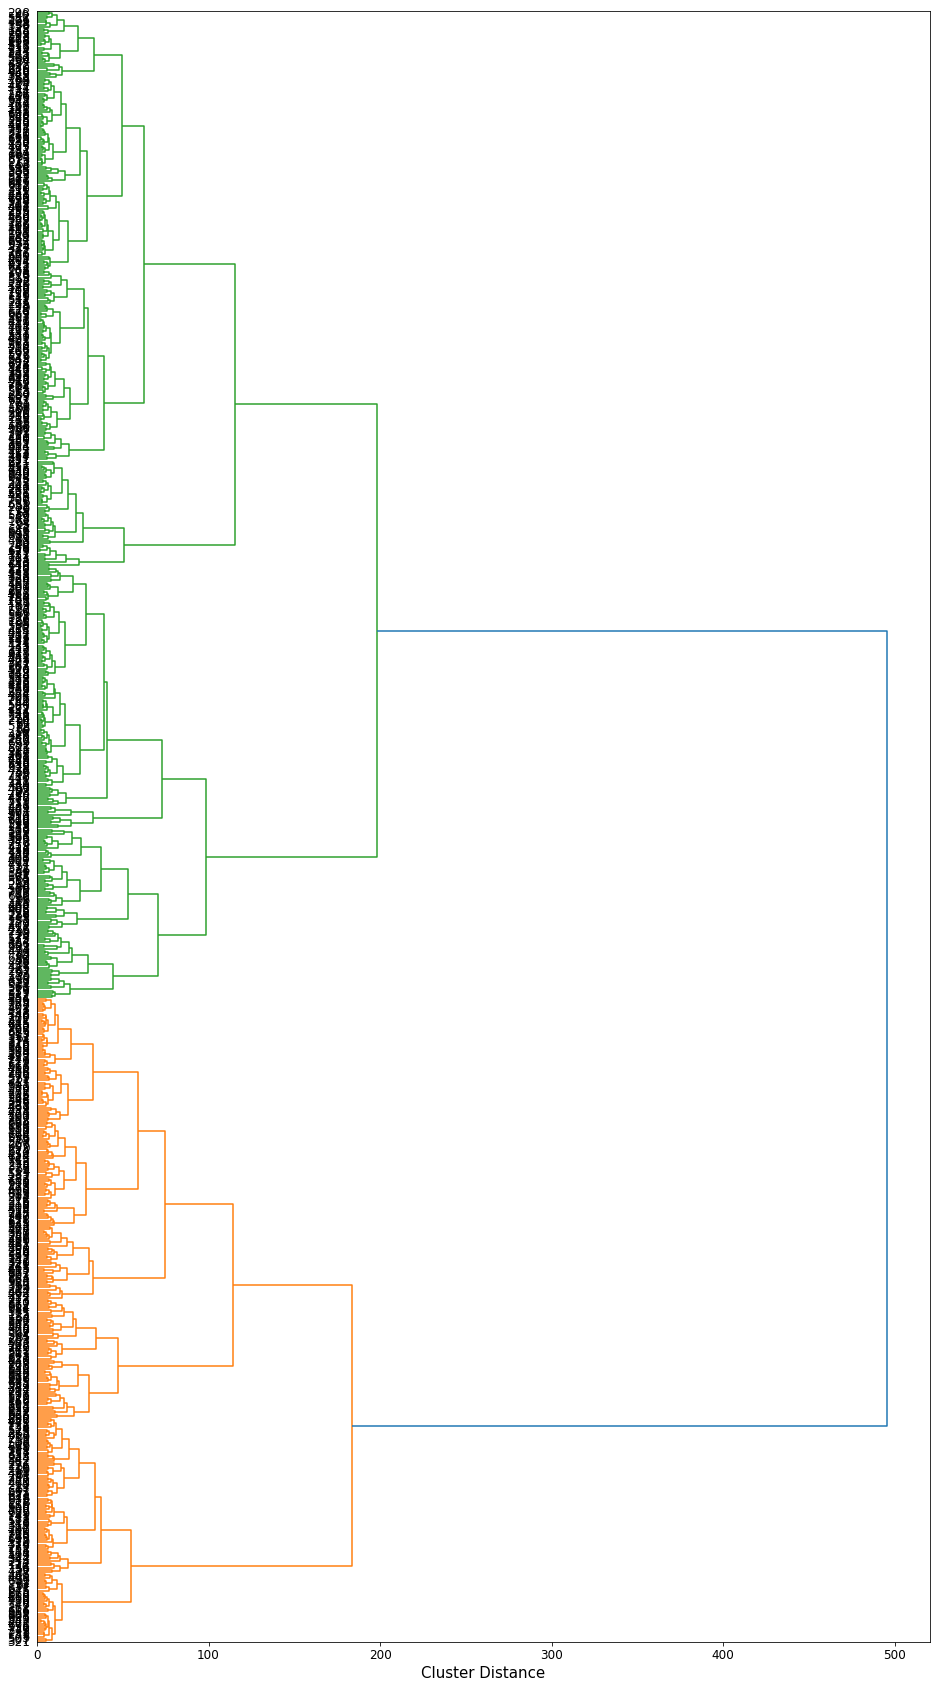

In [8]:
fig = plt.figure(figsize=(16, 30))
ax = fig.add_subplot(1, 1, 1)

dendrogram = sch.dendrogram(sch.linkage(filtered_data_01, method="ward") , ax = ax, orientation='right')
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
ax.tick_params(axis = 'y', which = 'major', labelsize = 12)
ax.set_xlabel('Cluster Distance', fontsize = 15)
plt.show()

In [9]:
labels = {}

models = AgglomerativeClustering(n_clusters = 11, affinity = 'euclidean', linkage ='ward')
labels['distance'] = models.fit_predict(filtered_data_01)

In [10]:
labels['distance']

array([ 0,  4,  6,  3,  0, 10,  4,  1,  1, 10,  6,  2,  3,  3,  1,  3,  6,
        6, 10,  1,  4,  6,  2,  6,  2,  4,  1,  0, 10,  7,  9,  4,  9,  9,
        9,  3,  3,  1,  2,  1,  2, 10,  6,  9,  6,  6,  1,  4,  4,  2, 10,
        2, 10,  4,  5,  0,  6,  1,  6,  6,  6,  1,  0,  4,  4,  3, 10,  6,
        2,  0,  1, 10,  0,  8,  8,  4, 10, 10,  1,  1,  1,  1,  9,  9,  2,
        5,  6,  1, 10, 10,  2, 10,  6,  2,  6,  6,  3,  9,  3,  9,  1,  3,
        0,  2, 10,  2,  2,  2,  5,  3,  1,  4,  1,  2,  1,  4,  1,  9, 10,
        1,  6,  6,  2,  5,  1,  9,  3,  6,  3,  2,  3,  0, 10,  6,  2,  2,
        1,  7,  0,  5,  1,  2,  7,  0,  2, 10,  1, 10,  1,  6, 10,  1,  1,
       10,  0,  0,  5, 10,  4,  7,  0,  6,  4,  6,  0,  6,  6, 10,  2,  2,
        0, 10,  0,  9,  9,  5,  6,  4,  2,  3,  2,  1,  6,  1,  0,  6,  2,
        5,  6,  2,  0,  6,  2, 10,  2, 10,  2, 10,  0, 10,  0,  2,  2,  6,
        0,  4, 10,  2,  0,  6,  2,  1, 10,  2, 10,  0,  0,  7,  6,  0,  3,
        6,  6,  0,  4, 10

In [13]:
dissimilarity = 1 - np.abs(filtered_data_01.T.corr())
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['pearson'] = fcluster(hierarchy, 11, criterion='maxclust') - 1

In [14]:
labels['pearson']

array([ 2,  4,  4,  5,  9,  5,  4,  2,  1,  4,  4,  5, 10,  6,  1,  5,  4,
        0,  4,  9,  4,  4,  9,  0,  4,  5,  4,  0,  6,  1, 10,  5, 10, 10,
       10,  6,  5,  6,  2,  9,  9,  4,  5,  6,  4,  5,  7,  5,  6,  4,  5,
        0,  9,  6,  6,  5,  4,  2,  4,  3,  4,  3,  4,  4,  5, 10,  4,  4,
        4,  0,  2,  4,  0,  1,  1,  4,  4,  4,  7,  1,  5,  7, 10, 10, 10,
        6,  4,  7,  2,  4,  3,  2,  0,  4,  4,  4,  6, 10,  6, 10,  1,  5,
        0,  0,  6,  4,  4,  0,  6,  6,  6,  4,  7, 10,  7,  3,  2, 10,  5,
        0,  0,  5,  2,  3,  5,  6,  6,  4,  6,  0,  3,  4,  5,  4,  1,  1,
        7,  1,  0,  7,  1,  0,  0,  9,  4,  6,  1,  4,  1,  4,  0,  8,  7,
        0,  2,  4, 10, 10,  4,  1,  4,  5,  5,  0,  0,  4,  2,  4,  0,  3,
        0,  4,  0, 10, 10,  6,  0,  4,  0,  6,  5,  9,  4,  1,  0,  4,  4,
        6,  9,  4,  0,  3,  0,  4,  0,  2, 10, 10,  0,  4,  3,  5,  4,  7,
        0,  4,  4,  4,  4,  0,  0,  2,  2,  4,  4,  0,  0,  1,  4,  3,  6,
        4,  4,  0, 10, 10

In [15]:
dissimilarity = 1 - np.abs(filtered_data_01.T.corr(method='spearman'))
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['spearman'] = fcluster(hierarchy, 11, criterion='maxclust') - 1

In [16]:
labels['spearman']

array([ 7,  3,  5,  0,  9,  0,  3,  7,  8,  4,  3,  1,  2,  0,  8,  1,  3,
        9,  3,  7,  3,  1,  7,  8,  3,  1,  5,  9,  0,  8,  2,  1,  2,  2,
        7,  0,  1,  0,  7, 10,  7,  3,  0,  0,  8,  1,  7,  0,  0,  3,  3,
        7,  7,  0,  0,  1,  3,  7,  3,  4,  3,  5,  3,  3,  1,  2,  3,  3,
        7, 10,  8,  3,  9,  7, 10,  3,  3,  7,  7,  8,  5,  6,  2,  2,  2,
        0,  3,  5,  7,  8,  4,  7,  8,  7,  3,  3,  0,  2,  0,  2,  8,  0,
        8,  9,  0,  3,  3,  9,  0,  0,  0,  3,  2,  2,  5,  5,  8,  2,  1,
       10,  9,  1,  2,  0,  1,  0,  0,  3,  0,  9,  4,  3,  1,  9,  8,  8,
        0,  7,  9,  7,  8,  9, 10,  9,  7,  0,  8,  3,  7,  3,  8,  0,  7,
        9,  9,  7,  7,  2,  7,  8,  3,  1,  1,  7,  8,  3,  7,  3,  9,  8,
        9,  3,  9,  2,  2,  0,  9,  7,  9,  0,  3,  5,  3,  8,  9,  3,  3,
        0,  7,  3,  9,  8,  9,  4,  9,  9,  2,  2,  8,  3,  4,  1,  3,  7,
        8,  3,  5,  3,  8,  9,  9,  9,  8,  7,  3,  8,  4,  8,  5,  4,  0,
        3,  8,  9,  1,  7

In [18]:
from itertools import groupby

clusters = {}

for key1, label1 in labels.items():
    clusters[key1] = [list(map(lambda x: x[0], v)) for k,v in groupby(sorted(zip(filtered_data_01.index, labels['spearman']), key = lambda x: x[1]), lambda s: s[1])]
    
    for key2, label2 in labels.items():
        if key1 != key2:
            print(key1, ' vs ', key2, ': ', adjusted_rand_score(label1, label2))

distance  vs  pearson :  0.1302540227318028
distance  vs  spearman :  0.10589250576037126
pearson  vs  distance :  0.1302540227318028
pearson  vs  spearman :  0.4698709221556804
spearman  vs  distance :  0.10589250576037126
spearman  vs  pearson :  0.4698709221556804


In [19]:
i = 0
for c in clusters['distance']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)



Cluster 0 :

NMNAT1
FBLIM1
PTAFR
GADD45A
F3
S1PR1
PEAR1
IFI16
QSOX1
LAMC2
LAMB3
HSD11B1
HTR7
PTPRE
ANO9
CYB5R2
DKK3
SAA2
SAA1
BDNF-AS
MMP10
CASP4
CASP1
MCAM
C3AR1
EMP1
COL2A1
HCAR3
GJB2
LCP1
SPINT1
RHCG
ALDH1A3
PRSS22
CTF1
MT2A
CDH3
MARVELD3
KCTD11
TMC6
TMC8
CCBE1
SERPINB4
SERPINB3
SERPINB7
TGFBR3L
ANGPTL4
ZNF850
KCNK6
ZNF841
ZNF28
ZNF525
FAM110C
PXDN
FAM49A
FNDC4
XDH
EFEMP1
TGFA
HK2
IL1A
IL1B
ARHGEF4
COBLL1
CALCRL
AOX1
MAP2
PI3
SDC4
PLTP
HSF2BP
BIK
TGM4
FILIP1L
CLDN16
IL1RAP
NIPAL1
CXCL6
LOC100507053
FHDC1
TLR2
PDGFC
IL7R
PARP8
FOXD1
ELL2
HBEGF
PCDH1
ADRB2
ADTRP
GPSM3
COL12A1
BACH2
DLL1
LRRD1
CAV2
LETM2
SDR16C5
CD274
IFNK
BSPRY
LCN2
PNPLA4


Cluster 1 :

STX12
SPOCD1
MOB3C
JUN
CYR61
FRRS1
BLZF1
SERTAD4-AS1
KLF6
FOSL1
MAML2
WTAPP1
ETS1
CPM
PHLDA1
FRMD6
B2M
HMGN2P46
IL32
CD68
PIPOX
NOG
GATA6
RIOK3
SERPINB8
C3
ICAM1
ZNF136
CPAMD8
FXYD5
ZNF229
ZNF583
ZNF419
ZNF773
ZNF549
ZNF606
ZNF544
SOWAHC
CFLAR
MREG
DIRC3
DAW1
CD40
BTG3
CRKL
MMP11
MAFF
PDGFB
CDCP1
C3orf67
NFKBIZ
CD47
TIPARP
YEATS2
MA

In [ ]:
i = 0
for c in clusters['pearson']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['spearman']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [20]:
import enrichmentAnalysis as ea

results_enrichment = {'distance': [], 'pearson': [], 'spearman': []}

for cluster_type in clusters:
    for cluster in clusters[cluster_type]:
        results_enrichment[cluster_type] += [ea.getEnrichment(list(cluster), 'GO_Biological_Process_2021')['GO_Biological_Process_2021']]

results_enrichment

Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlap

{'distance': [[[1,
    'cellular response to cytokine stimulus (GO:0071345)',
    1.791657719953557e-07,
    6.530442715835974,
    101.45012953548662,
    ['CTF1',
     'PTAFR',
     'IL1RAP',
     'F3',
     'IL1A',
     'MT2A',
     'IFI16',
     'IL1B',
     'S1PR1',
     'LCN2',
     'IFNK',
     'CASP1',
     'SAA1',
     'TLR2'],
    0.00018274908743526281,
    0,
    0],
   [2,
    'cytokine-mediated signaling pathway (GO:0019221)',
    6.634245275088766e-07,
    5.426136363636363,
    77.19140599686203,
    ['CXCL6',
     'CTF1',
     'PTAFR',
     'IL1RAP',
     'F3',
     'IL1A',
     'MT2A',
     'IL1B',
     'S1PR1',
     'LCN2',
     'IFNK',
     'CASP1',
     'SAA1',
     'LCP1',
     'IL7R'],
    0.0003383465090295271,
    0,
    0],
   [3,
    'apoptotic process (GO:0006915)',
    2.598622392016149e-05,
    7.4294075997167806,
    78.43926946221032,
    ['IL1A', 'BIK', 'GADD45A', 'IL1B', 'CASP4', 'CASP1', 'HK2', 'TLR2'],
    0.006168126942600708,
    0,
    0],
   [4,


In [21]:
import json

with open('results_joined.json', 'w') as file:
     #file.write(json.dumps(results_enrichment)) # use `json.loads` to do the reverse

In [2]:
import json

with open('results_joined.json') as file:
    results_enrichment = json.load(file)

In [9]:
dataset = {'p-value': [], 'Score': [], 'Cluster': []}
index = []

for cluster_num in range(len(results_enrichment['distance'])):
    for term in results_enrichment['distance'][cluster_num]:
        index += [term[1]]
        dataset['p-value'] += [term[6]]
        dataset['Score'] += [term[4]]
        dataset['Cluster'] += [cluster_num]
enrichment_dataset = pd.DataFrame(dataset, index = index)

In [10]:
pd.set_option("display.max_rows", None)
selection = enrichment_dataset[enrichment_dataset['p-value'] < 0.01].sort_values('Score', ascending = False).head(10000)

selection['p-value'] = selection['p-value'].map(lambda x: '%.2E' % x)
selection['Score'] = selection['Score'].map(lambda x: '%.2f' % x)

#selection.to_csv('joined_table_all.csv')
selection

p-value    Score  Cluster
type I interferon signaling pathway (GO:0060337)    4.40E-27  9111.11        2
cellular response to type I interferon (GO:0071...  4.40E-27  9111.11        2
negative regulation of viral genome replication...  1.10E-16  3820.31        2
defense response to symbiont (GO:0140546)           7.74E-22  3260.22        2
cytoplasmic pattern recognition receptor signal...  1.74E-06  3253.53        2
negative regulation of viral process (GO:0048525)   5.16E-17  3163.10        2
defense response to virus (GO:0051607)              2.34E-21  2930.10        2
antigen processing and presentation of endogeno...  4.42E-05  2797.75        2
antigen processing and presentation of endogeno...  4.42E-05  2797.75        2
regulation of viral genome replication (GO:0045...  1.64E-15  2717.94        2
interferon-gamma-mediated signaling pathway (GO...  1.79E-15  2656.13        2
protein mono-ADP-ribosylation (GO:0140289)          3.35E-06  2318.71        2
antigen processing and presentation of exogenou...  6.69E-05  2159.41        2
cellular response to interferon-gamma (GO:0071346)  5.16E-17  2028.44        2
negative regulation of lipid localization (GO:1...  8.90E-05  1742.91        2
response to interferon-beta (GO:0035456)            6.88E-08  1678.71        2
regulation of ribonuclease activity (GO:0060700)    1.81E-03  1644.95        2
positive regulation of glial cell proliferation...  1.81E-03  1644.95        2
interleukin-27-mediated signaling pathway (GO:0...  7.76E-06  1582.01        2
cytokine-mediated signaling pathway (GO:0019221)    6.11E-25  1457.27        2
protein poly-ADP-ribosylation (GO:0070212)          1.23E-04  1451.28        2
positive regulation of natural killer cell prol...  5.80E-03  1445.70        7
regulation of mononuclear cell proliferation (G...  5.80E-03  1445.70        7
regulation of NK T cell proliferation (GO:0051140)  5.80E-03  1445.70        7
positive regulation of mononuclear cell prolife...  5.80E-03  1445.70        7
positive regulation of cell fate commitment (GO...  5.80E-03  1445.70        7
detection of virus (GO:0009597)                     2.34E-03  1177.89        2
regulation of nuclease activity (GO:0032069)        2.34E-03  1177.89        2
positive regulation of I-kappaB phosphorylation...  2.34E-03  1177.89        2
ISG15-protein conjugation (GO:0032020)              2.34E-03  1177.89        2
regulation of smooth muscle cell proliferation ...  5.49E-08  1055.64        2
regulation of T-helper 17 cell lineage commitme...  7.78E-03  1034.09        7
morphogenesis of an endothelium (GO:0003159)        7.78E-03  1034.09        7
regulation of NK T cell activation (GO:0051133)     7.78E-03  1034.09        7
positive regulation of interferon-alpha product...  2.30E-05   998.27        2
RIG-I signaling pathway (GO:0039529)                2.91E-03   905.29        2
positive regulation of gliogenesis (GO:0014015)     2.91E-03   905.29        2
regulation of I-kappaB phosphorylation (GO:1903...  2.91E-03   905.29        2
positive regulation of response to biotic stimu...  8.94E-07   810.09        2
positive regulation of activation of Janus kina...  8.98E-03   793.99        7
positive regulation of NK T cell activation (GO...  8.98E-03   793.99        7
positive regulation of T-helper 17 cell differe...  8.98E-03   793.99        7
regulation of natural killer cell proliferation...  8.98E-03   793.99        7
positive regulation of smooth muscle cell proli...  9.71E-07   783.80        2
positive regulation of response to cytokine sti...  3.94E-04   753.85        2
cellular response to virus (GO:0098586)             6.72E-06   746.37        2
positive regulation of homotypic cell-cell adhe...  3.63E-03   728.06        2
positive regulation of interferon-beta producti...  7.30E-06   715.44        2
regulation of interferon-alpha production (GO:0...  5.25E-05   709.18        2
regulation of innate immune response (GO:0045088)   2.46E-07   706.80        2
positive regulation of o

In [37]:
results = ea.getEnrichment(list(filtered_data_01.index), 'GO_Biological_Process_2021')['GO_Biological_Process_2021']

dataset = {'p-value': [], 'c-score': []}
index = []

for term in results:
    index += [term[1]]
    dataset['p-value'] += [term[6]]
    dataset['c-score'] += [term[4]]
enrichment_dataset = pd.DataFrame(dataset, index = index)

Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value


In [38]:
results

[[1,
  'cytokine-mediated signaling pathway (GO:0019221)',
  1.140259704677158e-29,
  4.792344845838295,
  319.3796480297958,
  ['CXCL6',
   'CSF3',
   'IFITM1',
   'CD40',
   'CSF2',
   'CSF1',
   'IFIT5',
   'PIK3CD',
   'CXCL1',
   'IL1RAP',
   'CXCL3',
   'TNF',
   'CXCL2',
   'IFIT3',
   'CX3CL1',
   'CXCL5',
   'CRKL',
   'ICAM1',
   'IFIT2',
   'OASL',
   'MT2A',
   'PSMD7',
   'CASP1',
   'IL12B',
   'TRIM25',
   'IL12A',
   'JAK3',
   'B2M',
   'IFNAR2',
   'IL15RA',
   'HLA-B',
   'HLA-C',
   'TRAF1',
   'HLA-F',
   'F3',
   'VAV1',
   'EREG',
   'IL1A',
   'IL23A',
   'OAS2',
   'IL1B',
   'IRF1',
   'PSME1',
   'IFNK',
   'IRF7',
   'PRTN3',
   'LCP1',
   'LTB',
   'CD44',
   'IRF9',
   'BIRC3',
   'SP100',
   'CTF1',
   'PTAFR',
   'EBI3',
   'PDGFB',
   'SOCS2',
   'SOCS3',
   'UGCG',
   'IRAK2',
   'CCL5',
   'UBC',
   'STAT4',
   'S1PR1',
   'CCL2',
   'PTK2B',
   'SOCS6',
   'GBP2',
   'GBP1',
   'STAT5A',
   'IL32',
   'CCL20',
   'IL10RB',
   'STAT1',
   'STAT2',
   

In [40]:
pd.set_option("display.max_rows", None)
selection = enrichment_dataset[enrichment_dataset['p-value'] < 0.01].sort_values('c-score', ascending = False).head(25)

selection['p-value'] = selection['p-value'].map(lambda x: '%.2E' % x)
selection['c-score'] = selection['c-score'].map(lambda x: '%.2f' % x)

selection.to_csv('comparison_joined_table.csv')
selection

p-value c-score
cellular response to type I interferon (GO:0071...  2.35E-10  324.03
type I interferon signaling pathway (GO:0060337)    2.35E-10  324.03
cytokine-mediated signaling pathway (GO:0019221)    3.80E-26  319.38
protein mono-ADP-ribosylation (GO:0140289)          3.22E-04  319.17
receptor signaling pathway via STAT (GO:0097696)    2.73E-06  299.82
receptor signaling pathway via JAK-STAT (GO:000...  2.50E-06  250.15
antigen processing and presentation of exogenou...  7.04E-03  219.44
negative regulation of bone remodeling (GO:0046...  2.62E-03  212.68
interferon-gamma-mediated signaling pathway (GO...  3.48E-08  211.38
cellular response to interferon-gamma (GO:0071346)  5.98E-10  192.56
cellular response to cytokine stimulus (GO:0071...  6.64E-16  177.02
negative regulation of bone resorption (GO:0045...  9.92E-03  164.52
positive regulation of tyrosine phosphorylation...  1.39E-06  163.05
negative regulation of viral genome replication...  2.50E-06  159.30
positive regulation of defense response (GO:003...  6.15E-08  155.70
regulation of tyrosine phosphorylation of STAT ...  1.39E-06  146.93
defense response to symbiont (GO:0140546)           3.48E-08  141.92
negative regulation of viral process (GO:0048525)   2.02E-06  138.13
response to interferon-gamma (GO:0034341)           2.11E-06  125.13
defense response to virus (GO:0051607)              1.19E-07  121.67
response to interferon-beta (GO:0035456)            8.82E-04  116.74
interleukin-7-mediated signaling pathway (GO:00...  3.67E-03  111.23
cellular response to interleukin-7 (GO:0098761)     3.67E-03  111.23
positive regulation of response to external sti...  2.73E-07  110.34
protein kinase B signaling (GO:0043491)             2.10E-03  108.05

## Clustering on columns

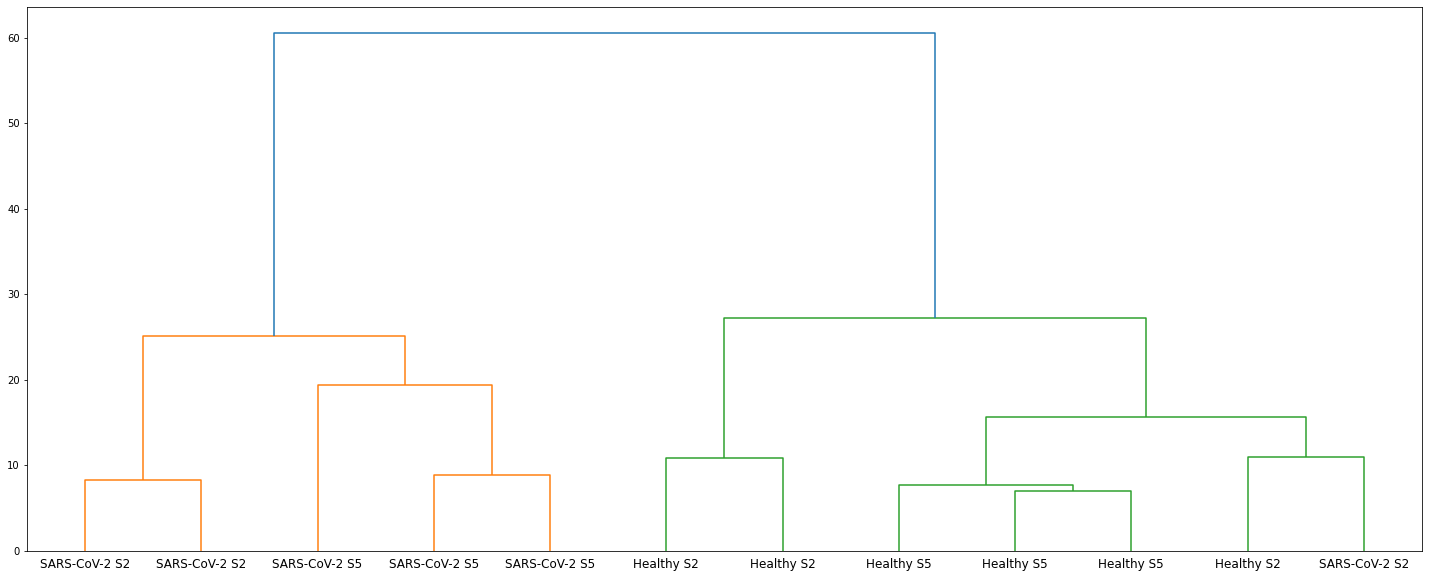

In [58]:
fig = plt.figure(figsize=(25, 10))
dendrogram = sch.dendrogram(sch.linkage(filtered_data.T, method="ward"), labels = list(['Healthy S2', 'Healthy S2', 'Healthy S2', 'SARS-CoV-2 S2', 'SARS-CoV-2 S2', 'SARS-CoV-2 S2', 'Healthy S5', 'Healthy S5', 'Healthy S5', 'SARS-CoV-2 S5', 'SARS-CoV-2 S5', 'SARS-CoV-2 S5']))
plt.show()

In [49]:
filtered_data.columns

Index(['Series2_A549_Mock_1', 'Series2_A549_Mock_2', 'Series2_A549_Mock_3',
       'Series2_A549_SARS-CoV-2_1', 'Series2_A549_SARS-CoV-2_2',
       'Series2_A549_SARS-CoV-2_3', 'Series5_A549_Mock_1',
       'Series5_A549_Mock_2', 'Series5_A549_Mock_3',
       'Series5_A549_SARS-CoV-2_1', 'Series5_A549_SARS-CoV-2_2',
       'Series5_A549_SARS-CoV-2_3'],
      dtype='object')

In [25]:
labels_columns = {}

models = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
labels_columns['distance'] = models.fit_predict(filtered_data.T)

labels_true = [0 if col in columns_healthy else 1 for col in filtered_data.columns]

print("True: ", labels_true)
print("Predicted: ", labels_columns['distance'])
print(adjusted_rand_score(labels_true, labels_columns['distance']))

True:  [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
Predicted:  [0 0 0 1 0 0 0 0 0 1 1 1]
0.39560439560439553
